# Machine Learning Project : 

Prepared by : Kisha Taylor


####  Breast Cancer prediction 

Machine Learning Pipeline

Methodology :

**Steps :**
    
1. Problem Definition

2. Data Collection

Dataset : Breast cancer detection

3. Data Preparation

     (i) Data Exloration & Analysis

     (ii) Data Cleaning 
          (No missing data in this case)

     (iii) Split into Train and Test

      (iv) Feature Generation &/Or Feature Selection

  
4. Train Model

5. Validate Model & Tune Model hyperparameters


6. Select best model

7. Report results

8. Conclusion

## List of models used :
    1. Decison Tree
    
   **_Ensemble Models_** : 
    2. Random Forest
             
    3. Gradient Boosted Tree
     
    

## Step #1 : Problem Formulation 
This is a binary classification problem where we are predicting whether or not a patient has breast cancer.

These predictions are made based on a set of characteristic features of the cell sample for a given patient 
from a Fine Needle Aspiration procedure.

## Step #2. Data Collection 

In [580]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing dataset into dataframe (does not have header) 
df = pd.read_csv("C:/Users/Kisha/Downloads/BreatCancer Dataset/breast-cancer.csv",",",header=None)


In [3]:
# reading header by first create file object
Hdr = open("C:/Users/Kisha/Downloads/BreatCancer Dataset/field_names.txt","r")

# read data and split on new line
col = Hdr.read().split("\n")
Hdr.close()

In [4]:
col #splits data and stores in list; we view the data to verify that the header has been read in correctly.

['ID',
 'diagnosis',
 'radius_mean',
 'radius_sd_error',
 'radius_worst',
 'texture_mean',
 'texture_sd_error',
 'texture_worst',
 'perimeter_mean',
 'perimeter_sd_error',
 'perimeter_worst',
 'area_mean',
 'area_sd_error',
 'area_worst',
 'smoothness_mean',
 'smoothness_sd_error',
 'smoothness_worst',
 'compactness_mean',
 'compactness_sd_error',
 'compactness_worst',
 'concavity_mean',
 'concavity_sd_error',
 'concavity_worst',
 'concave_points_mean',
 'concave_points_sd_error',
 'concave_points_worst',
 'symmetry_mean',
 'symmetry_sd_error',
 'symmetry_worst',
 'fractal_dimension_mean',
 'fractal_dimension_sd_error',
 'fractal_dimension_worst']

In [5]:
df.head() # before header

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


setting header onto the dataset

In [6]:
df.columns = col
df.columns

Index(['ID', 'diagnosis', 'radius_mean', 'radius_sd_error', 'radius_worst',
       'texture_mean', 'texture_sd_error', 'texture_worst', 'perimeter_mean',
       'perimeter_sd_error', 'perimeter_worst', 'area_mean', 'area_sd_error',
       'area_worst', 'smoothness_mean', 'smoothness_sd_error',
       'smoothness_worst', 'compactness_mean', 'compactness_sd_error',
       'compactness_worst', 'concavity_mean', 'concavity_sd_error',
       'concavity_worst', 'concave_points_mean', 'concave_points_sd_error',
       'concave_points_worst', 'symmetry_mean', 'symmetry_sd_error',
       'symmetry_worst', 'fractal_dimension_mean',
       'fractal_dimension_sd_error', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
df.head() # dset after header; we now have the complete dataset

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Transformations on dataset :
(i) Adding header to datset

(ii) creating dummy vars ( i.e. converting the categoical variables into quatitaive discrete vars)

(iii) deleting addition dummmy var column

(iv) After identifying that there is an imbalnce of classes, we aplied an over-sampling technique (SMOTE)
     to balance the classes.

### Step #3 : Data Preparation

Data Exploration

Let's try to understand our dataset

In [8]:
df.shape

(569, 32)

In [9]:
df.describe()

,ID,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Comparison of two mean and two medians 

In [21]:
B = df[df["diagnosis"]=="B"].describe().loc[["mean","50%"],["smoothness_mean","smoothness_sd_error","smoothness_worst","compactness_mean","compactness_sd_error","compactness_worst"]]
M = df[df["diagnosis"]=="M"].describe().loc[["mean","50%"],["smoothness_mean","smoothness_sd_error","smoothness_worst","compactness_mean","compactness_sd_error","compactness_worst"]] 


In [20]:
BM = pd.DataFrame([])
BM["mean for group M"] = M.iloc[0,0:]
BM["mean for group B"] = B.iloc[0,0:]

BM["median for group M"] = M.iloc[1,0:]
BM["median for group B"] = B.iloc[1,0:]
BM.transpose()

,smoothness_mean,smoothness_sd_error,smoothness_worst,compactness_mean,compactness_sd_error,compactness_worst
mean for group M,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060
mean for group B,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858
median for group M,3.679500,58.455000,0.006209,0.028590,0.037125,0.014205
median for group B,1.851000,19.630000,0.006530,0.016310,0.018400,0.009061


### Smoothness (mean & median comparison across benign & malignant tumors)

Statistical technique used to assess staistical difference
between smoothness for the Benign group versus the malignant group

####  Approach/ Methodology :   Indepedent sample t-test (two-tailed test)

Step 1: State the null and alternative hypothesis
    Null Hypothesis : 
        population mean of the characteristic of interest (eg. smoothness ) for group "Benign (B)" rep. as mu1
        minus 
        population mean of the characteristic of interest (eg. smoothness ) for group "Malignant (M)" rep. as mu2
        equals zero ( i.e there is no difference)
        
    Alternative Hypothesis:
        mu1 - mu2 Not equal to zero    
        (i.e. there is a difference)
        
Step 2: Determine which test statistic we will use based on known variables
        We do Not know the popuation std deviation so we will use the t-test (student test) 
                
Step 3 : calculate the t-test    

Step 4 : derive the p-value for that t-test statistic 
    
Step 5 : compare the p-value for that t-test statistic to our significance level (alpha) 
         where alpha is 0.05.
         
Step 6 : Draw conclusion based on the following :

         If the p-value for the t-test < alpha (0.05)
            then reject the null hypothesis 
            (i.e we conclude that there is a statistically significant difference between the two means)
         Else if p-value (for the t-test) > alpha
            then we do NOT reject the null hypothesis
            ( i.e we conclude that there is no statistically significant diference between the two means) 

  


Mean & median across all patients within each group for smoothness attributes 

For smoothness attributes, median stats

 diagnosis                              B          M
MEAN_of_smoothness_mean         2.000321   4.323929
MEAN_of_smoothness_sd_error    21.135148  72.672406
MEAN_of_smoothness_worst        0.007196   0.006780
MEDIAN_of_smoothness_mean       2.000321   4.323929
MEDIAN_of_smoothness_sd_error  21.135148  72.672406
MEDIAN_of_smoothness_worst      0.007196   0.006780


Text(0.5,1,'Mean across all instances for each smoothness statistic')

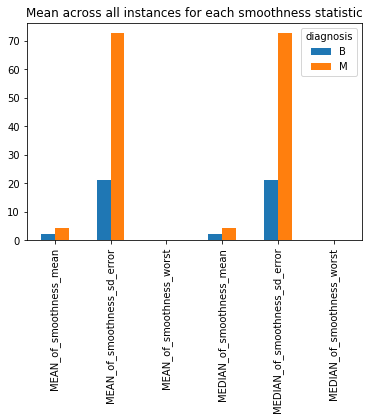

In [28]:
print("Mean & median across all patients within each group for smoothness attributes \n")
SMean = df.groupby(["diagnosis"]).agg('mean')[["smoothness_mean","smoothness_sd_error","smoothness_worst"]].transpose()
SMedian = df.groupby(["diagnosis"]).agg('mean')[["smoothness_mean","smoothness_sd_error","smoothness_worst"]].transpose()
CombinedSM = pd.concat([SMean,SMedian],axis=0)

# Changing the names of the metrics
newl1 =["MEAN_of_" + CombinedSM.index[i] for i in range(3)]
newl2 = ["MEDIAN_of_" + CombinedSM.index[i] for i in range(3)]
ls = newl1 + newl2
CombinedSM.index = ls

print("For smoothness attributes, median stats\n\n",CombinedSM)
CombinedSM.plot(kind='bar')
plt.title("Mean across all instances for each smoothness statistic")


In [32]:
from scipy import stats

SmoothB = df[["smoothness_mean","diagnosis"]][df["diagnosis"]=="B"]

SmoothM = df[["smoothness_mean","diagnosis"]][df["diagnosis"]=="M"]


# We used the tstat_ind function which return both the t-test statistic value and
# the corresponding pvalue for a two-tailed test. We assume that the variances in the populations are unequal
# as reflected by the argument "equal_var=False"

tstat, p = stats.ttest_ind(SmoothB["smoothness_mean"].values,SmoothM["smoothness_mean"].values,equal_var=False)
print("tstat = " + str(tstat),"\n")
print("p = " + str(p))
print("comparing p-vale to our alpha (significance level of 0.05")

tstat = -12.83276274696711 

p = 6.868552881086801e-29
comparing p-vale to our alpha (significance level of 0.05


### Conculsion

Since the p-alue is lower than our alpha (significance level)
we **Reject the Null Hypothesis in favour of the alternative.**
Thereby concluding that there is a statistical difference between 
the smoothness-mean for the benign class versus that of the malignant class

### Compactness_mean comparison

Mean & median across all patients within each group for compactness attributes 

For compactness attributes, median stats

 diagnosis                              B         M
MEAN_of_compactness_mean        0.021438  0.032281
MEAN_of_compactness_sd_error    0.025997  0.041824
MEAN_of_compactness_worst       0.009858  0.015060
MEDIAN_of_compactness_mean      0.021438  0.032281
MEDIAN_of_compactness_sd_error  0.025997  0.041824
MEDIAN_of_compactness_worst     0.009858  0.015060


Text(0.5,1,'Mean across all instances for each compactness statistic')

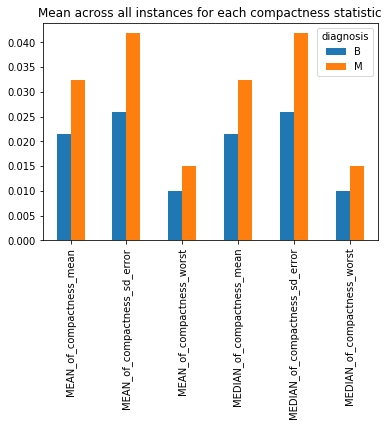

In [29]:
print("Mean & median across all patients within each group for compactness attributes \n")
CMean = df.groupby(["diagnosis"]).agg('mean')[["compactness_mean","compactness_sd_error","compactness_worst"]].transpose()
CMedian = df.groupby(["diagnosis"]).agg('mean')[["compactness_mean","compactness_sd_error","compactness_worst"]].transpose()
CombinedC = pd.concat([CMean,CMedian],axis=0)

# Changing the names of the metrics
newl1 =["MEAN_of_" + CombinedC.index[i] for i in range(3)]
newl2 = ["MEDIAN_of_" + CombinedC.index[i] for i in range(3)]
ls = newl1 + newl2
CombinedC.index = ls

print("For compactness attributes, median stats\n\n",CombinedC)
CombinedC.plot(kind='bar')
plt.title("Mean across all instances for each compactness statistic")


#### Statistical technique :
####    Indepedent sample t-test (two-tailed test)

In [39]:
CompactB = df[["compactness_mean","diagnosis"]][df["diagnosis"]=="B"]
CompactM = df[["compactness_mean","diagnosis"]][df["diagnosis"]=="M"]

Diff = np.mean(CompactB["compactness_mean"].values) -np.mean(CompactM["compactness_mean"].values)

tstat, p = stats.ttest_ind(CompactB["compactness_mean"].values,CompactM["compactness_mean"].values,equal_var=False)

print("Difference between the two means for compactness_mean feature:",Diff)
print("tstat = " + str(tstat),"\n")
print("p = " + str(p))
print("comparing p-value to our alpha (significance level of 0.05")

Difference between the two means for compactness_mean feature: -0.01084291859574019
tstat = -7.082641476498329 

p = 6.341807077270803e-12
comparing p-value to our alpha (significance level of 0.05


### Conculsion

Since the p-alue is lower than our alpha (significance level)
we **Reject the Null Hypothesis in favour of the alternative.**
Thereby concluding that there is a statistical difference between 
the compactness-mean for the benign class versus that of the malignant class

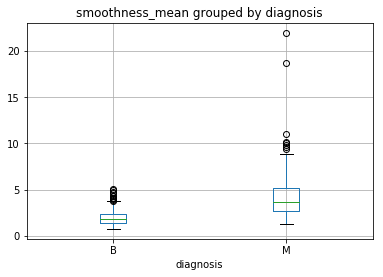

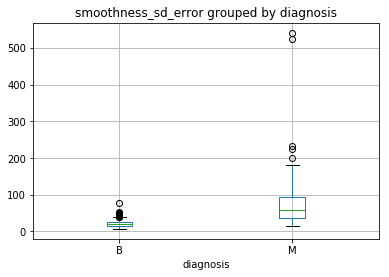

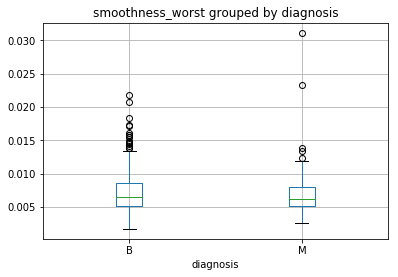

In [572]:
df.boxplot("smoothness_mean","diagnosis")
plt.title("smoothness_mean grouped by diagnosis")
plt.suptitle("")
df.boxplot("smoothness_sd_error","diagnosis")
plt.title("smoothness_sd_error grouped by diagnosis")
plt.suptitle("")
df.boxplot("smoothness_worst","diagnosis")
plt.title("smoothness_worst grouped by diagnosis")
plt.suptitle("")
plt.show()

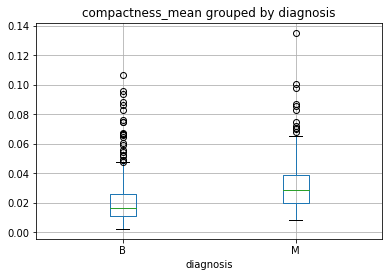

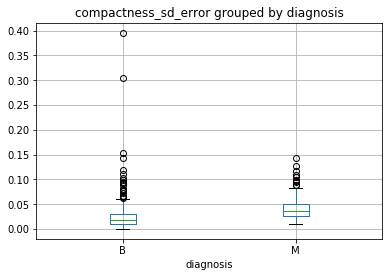

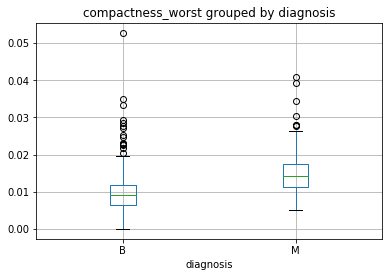

In [573]:
df.boxplot("compactness_mean","diagnosis")
plt.title("compactness_mean grouped by diagnosis")
plt.suptitle("")
df.boxplot("compactness_sd_error","diagnosis")
plt.title("compactness_sd_error grouped by diagnosis")
plt.suptitle("")
df.boxplot("compactness_worst","diagnosis")
plt.title("compactness_worst grouped by diagnosis")
plt.suptitle("")
plt.show()

### Methodology for difference in Medians for soothness & compactness


In [267]:
from scipy.stats import mstats

mstats.kruskalwallis(SmoothB["smoothness_mean"].values,SmoothM["smoothness_mean"].values)

#Ref. :https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.mstats.kruskalwallis.html

KruskalResult(statistic=225.73367534350723, pvalue=5.079184937836568e-51)

Note since the p-value is less than alpha of 0.05 (level of significance), 
we will reject the null hypothesis in favour of the alternative 
and conclude that there is a statistical difference between the smoothness_mean for Benign 
versus that of the Malignant group. 

In [268]:
mstats.kruskalwallis(CompactB["compactness_mean"].values,CompactM["compactness_mean"].values)

KruskalResult(statistic=82.30674630898051, pvalue=1.1652372315379308e-19)

Note since the p-value is less than alpha of 0.05 (level of significance), 
we will reject the null hypothesis in favour of the alternative 
and conclude that there is a statistical difference between the compactness_mean for Benign 
versus that of the Malignant group. 

## Bootstrap samples

In [575]:
# Bootstrap sampling
import random  as r

def BootstrapS(data,Sn):
# function takes two arguments, a dataframe "data" and the sample size "Sn"
# A random sample of the dataset is return for the defined sample size.

    Indx = data.index.values    
    r.shuffle(Indx)
    S1 = data.loc[Indx[0:Sn],:]
    return(S1)

print("Before: \n indices values in head :",df.head(5).index.values,"\n\n\n")
print(df.head(5))

Bs = BootstrapS(df,20).head(5)

print("\n\nAfter: \n indices values in head :",Bs.index.values,"\n\n\n")
print(Bs)


Before: 
 indices values in head : [0 1 2 3 4] 



         ID diagnosis  radius_mean  radius_sd_error  radius_worst  \
0    842302         M        17.99            10.38        122.80   
1    842517         M        20.57            17.77        132.90   
2  84300903         M        19.69            21.25        130.00   
3  84348301         M        11.42            20.38         77.58   
4  84358402         M        20.29            14.34        135.10   

   texture_mean  texture_sd_error  texture_worst  perimeter_mean  \
0        1001.0           0.11840        0.27760          0.3001   
1        1326.0           0.08474        0.07864          0.0869   
2        1203.0           0.10960        0.15990          0.1974   
3         386.1           0.14250        0.28390          0.2414   
4        1297.0           0.10030        0.13280          0.1980   

   perimeter_sd_error           ...             concavity_worst  \
0             0.14710           ...                       

### Exploratory Data Analysis (cont'd)

In [57]:
df.dtypes

ID                              int64
diagnosis                      object
radius_mean                   float64
radius_sd_error               float64
radius_worst                  float64
texture_mean                  float64
texture_sd_error              float64
texture_worst                 float64
perimeter_mean                float64
perimeter_sd_error            float64
perimeter_worst               float64
area_mean                     float64
area_sd_error                 float64
area_worst                    float64
smoothness_mean               float64
smoothness_sd_error           float64
smoothness_worst              float64
compactness_mean              float64
compactness_sd_error          float64
compactness_worst             float64
concavity_mean                float64
concavity_sd_error            float64
concavity_worst               float64
concave_points_mean           float64
concave_points_sd_error       float64
concave_points_worst          float64
symmetry_mea

In [576]:
ncols = df.shape[1]
ncols

32

In [63]:
df.columns

Index(['ID', 'diagnosis', 'radius_mean', 'radius_sd_error', 'radius_worst',
       'texture_mean', 'texture_sd_error', 'texture_worst', 'perimeter_mean',
       'perimeter_sd_error', 'perimeter_worst', 'area_mean', 'area_sd_error',
       'area_worst', 'smoothness_mean', 'smoothness_sd_error',
       'smoothness_worst', 'compactness_mean', 'compactness_sd_error',
       'compactness_worst', 'concavity_mean', 'concavity_sd_error',
       'concavity_worst', 'concave_points_mean', 'concave_points_sd_error',
       'concave_points_worst', 'symmetry_mean', 'symmetry_sd_error',
       'symmetry_worst', 'fractal_dimension_mean',
       'fractal_dimension_sd_error', 'fractal_dimension_worst'],
      dtype='object')

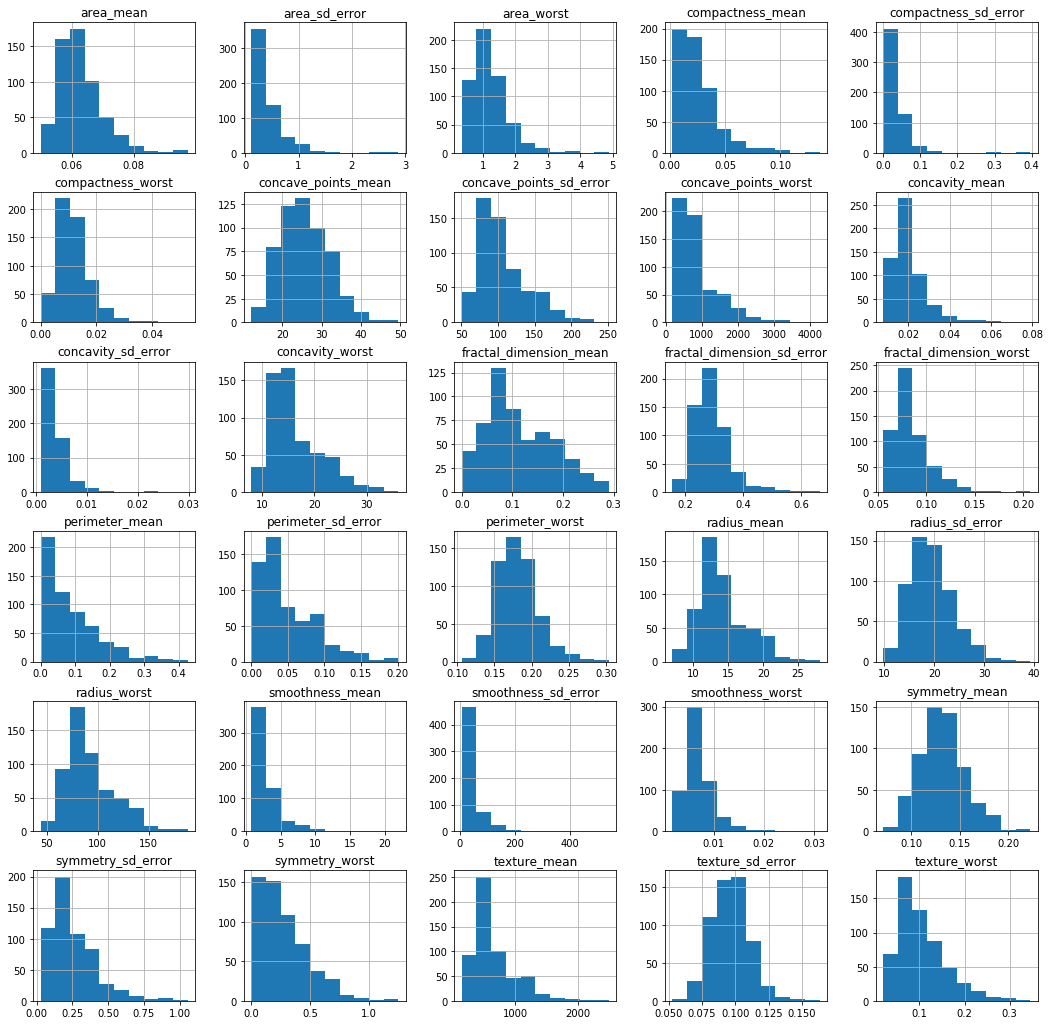

In [582]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (18,18))
ax = fig.gca()
df.drop(["ID","diagnosis"],axis=1).hist(ax=ax)
plt.show()

#### Observations 


None of the featres have normal dstributions. 

### Imbalanced class

In [73]:
print(" # instances in each class:", df.groupby(["diagnosis"]).agg('count').iloc[0:,0])
print(" \n % of instances in each class:",df.groupby(["diagnosis"]).agg('count').iloc[0:,0]*100/df.shape[0])

 # instances in each class: diagnosis
B    357
M    212
Name: ID, dtype: int64
 
 % of instances in each class: diagnosis
B    62.741652
M    37.258348
Name: ID, dtype: float64


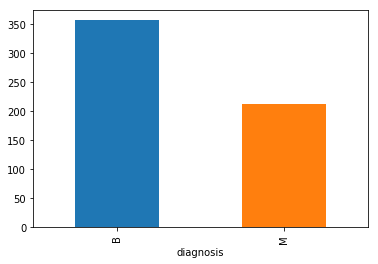

In [74]:
df.groupby(["diagnosis"]).agg('count').iloc[0:,1].plot.bar()


In [75]:
ncols

32

In [76]:
df.columns

Index(['ID', 'diagnosis', 'radius_mean', 'radius_sd_error', 'radius_worst',
       'texture_mean', 'texture_sd_error', 'texture_worst', 'perimeter_mean',
       'perimeter_sd_error', 'perimeter_worst', 'area_mean', 'area_sd_error',
       'area_worst', 'smoothness_mean', 'smoothness_sd_error',
       'smoothness_worst', 'compactness_mean', 'compactness_sd_error',
       'compactness_worst', 'concavity_mean', 'concavity_sd_error',
       'concavity_worst', 'concave_points_mean', 'concave_points_sd_error',
       'concave_points_worst', 'symmetry_mean', 'symmetry_sd_error',
       'symmetry_worst', 'fractal_dimension_mean',
       'fractal_dimension_sd_error', 'fractal_dimension_worst'],
      dtype='object')

In [77]:
dfbydiag = df.iloc[0:,1:].groupby(["diagnosis"]).agg('mean')
dfbydiag

,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


##### Let's compare the attributes by diagnosis using more statistical variables & visualizations

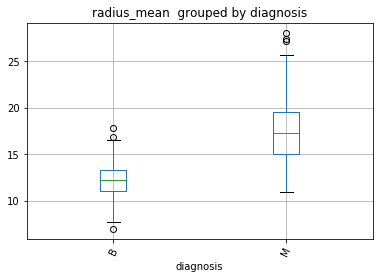

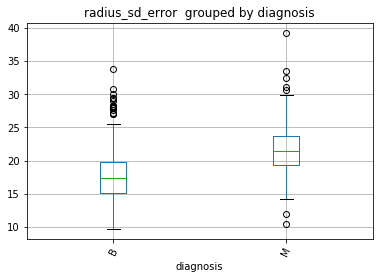

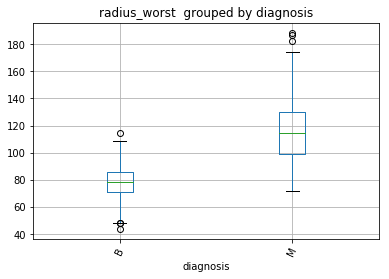

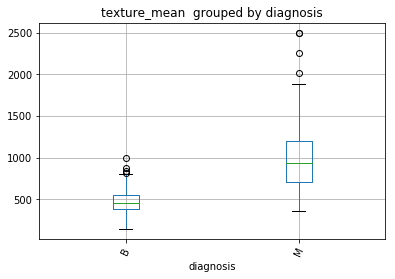

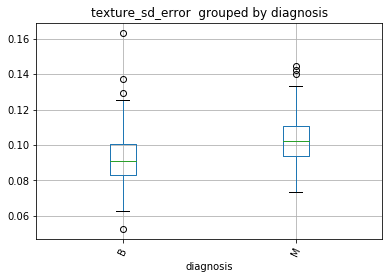

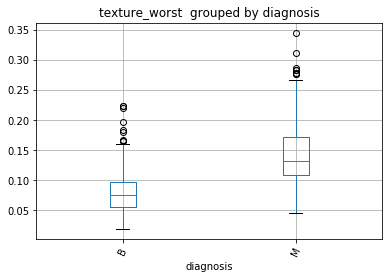

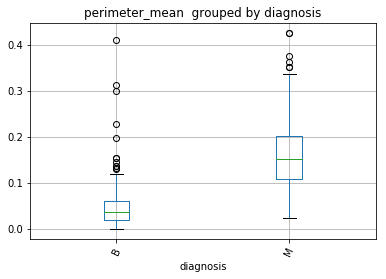

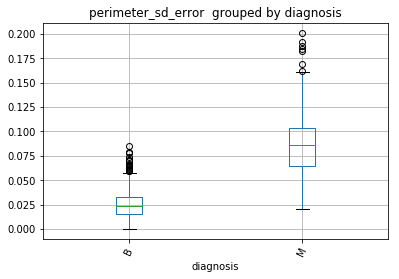

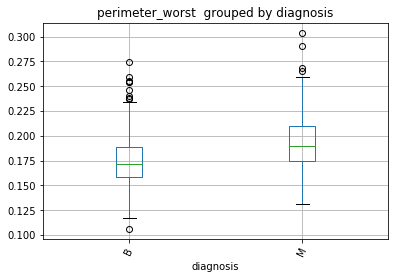

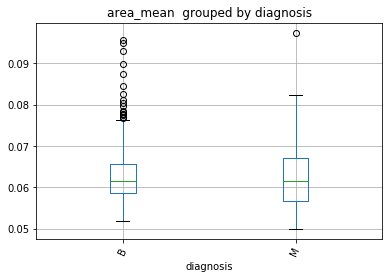

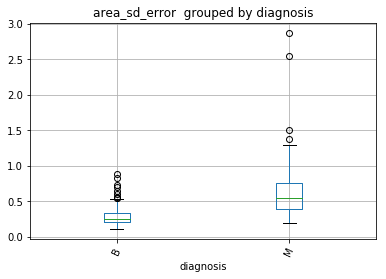

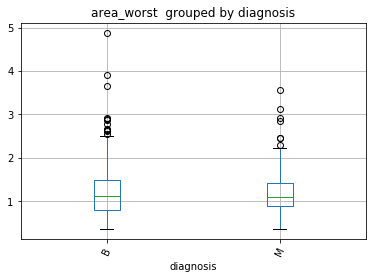

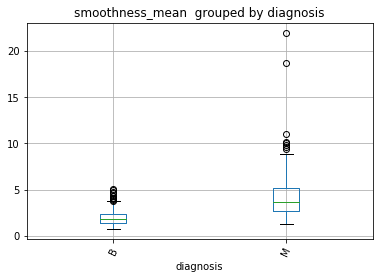

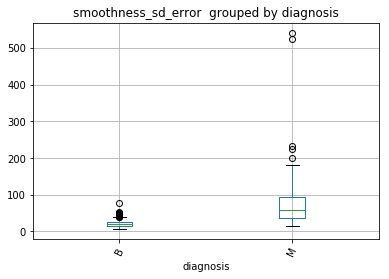

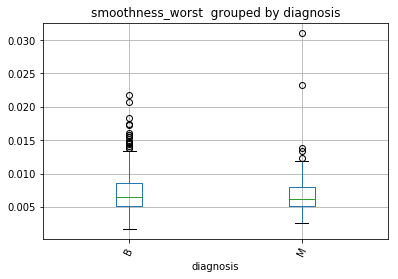

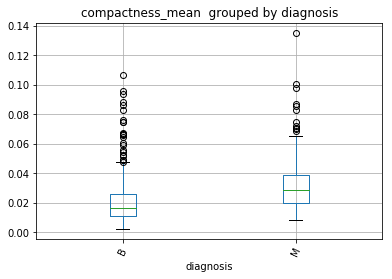

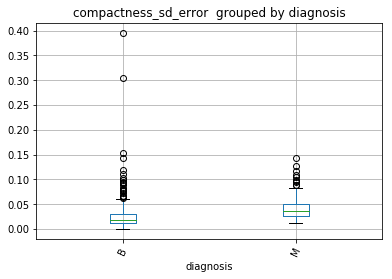

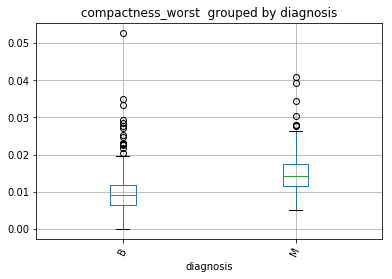

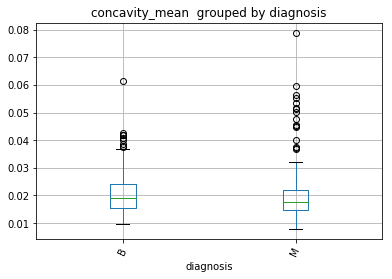

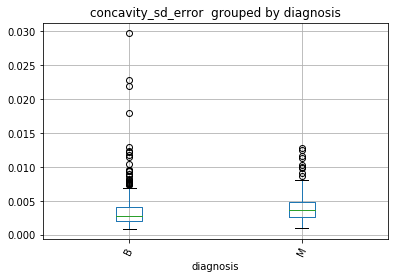

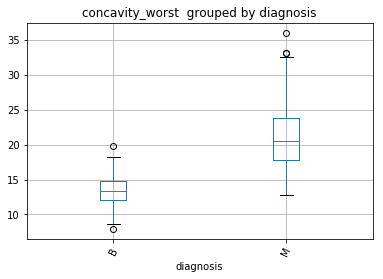

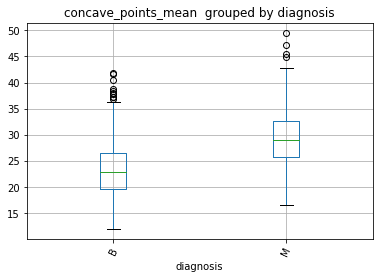

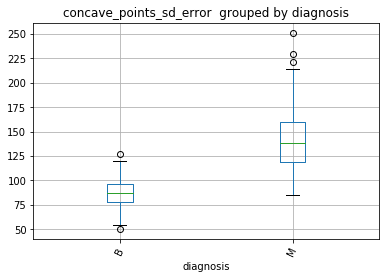

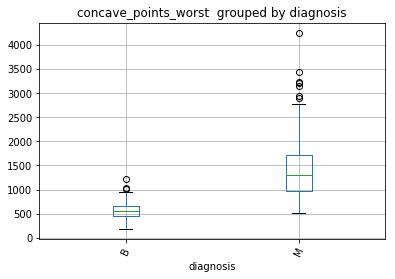

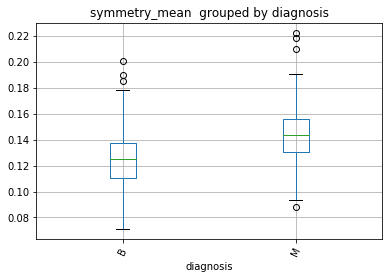

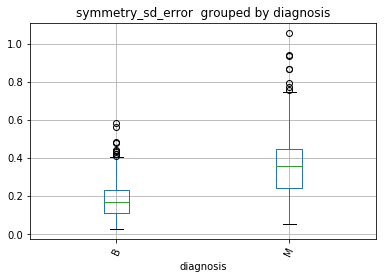

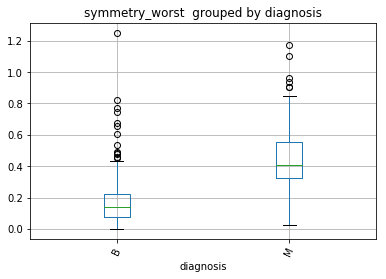

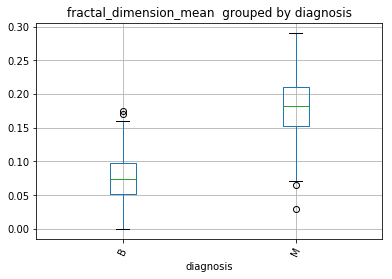

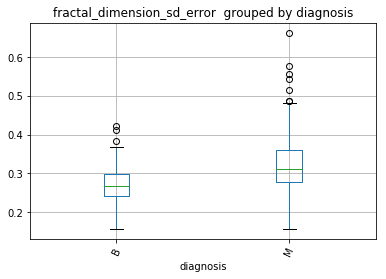

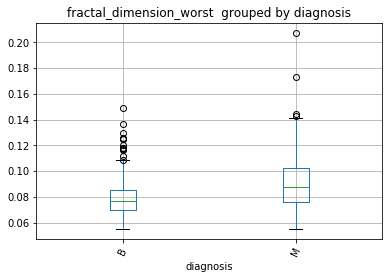

In [585]:
for i in range(2,ncols):
    df.boxplot(df.columns[i],'diagnosis',rot=65)
    plt.title(str(df.columns[i]) + "  grouped by diagnosis")
    plt.suptitle("")
    


### step3 : Data Cleaning

Let's check for missing values

In [79]:
# No missing values

df.isnull().sum()

ID                            0
diagnosis                     0
radius_mean                   0
radius_sd_error               0
radius_worst                  0
texture_mean                  0
texture_sd_error              0
texture_worst                 0
perimeter_mean                0
perimeter_sd_error            0
perimeter_worst               0
area_mean                     0
area_sd_error                 0
area_worst                    0
smoothness_mean               0
smoothness_sd_error           0
smoothness_worst              0
compactness_mean              0
compactness_sd_error          0
compactness_worst             0
concavity_mean                0
concavity_sd_error            0
concavity_worst               0
concave_points_mean           0
concave_points_sd_error       0
concave_points_worst          0
symmetry_mean                 0
symmetry_sd_error             0
symmetry_worst                0
fractal_dimension_mean        0
fractal_dimension_sd_error    0
fractal_

##### Let's convert categorical vars into dummy vars

Droping the attribute diagnosis as a categorical variable 
and also the newly generated label "B", retaining the dummy var "M"

In [80]:
newdf= pd.concat([df,pd.get_dummies(df.loc[:,"diagnosis"])],axis=1).drop(["diagnosis","B"],axis=1)

In [81]:
newdf.head()

,ID,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst,M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


### Feature selection/Engineering 

Let's check the corelation between vars
Note,  Pearson's correlation coefficient only identifies linear relationships not non-linear ones. 

### Split dataset into Train and test

We do this before feature selection/engineering
becuase we do not want to make any decisions regarding the features to include or exclude from the model based on 
using anything but the training data.

In [82]:
df.head()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Since the dataset is significantly imbalanced let us use stratified sampling


In [83]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(newdf,test_size=0.3,stratify=newdf["M"])



Let's verify that the ratio of positive intances
to negative instnces remain after the split.

In [84]:
newdf["M"].value_counts()*100/len(newdf["M"])

0    62.741652
1    37.258348
Name: M, dtype: float64

In [85]:
train["M"].value_counts()*100/len(train["M"])

0    62.81407
1    37.18593
Name: M, dtype: float64

In [86]:
test["M"].value_counts()*100/len(test["M"])

0    62.573099
1    37.426901
Name: M, dtype: float64

Now, let's continue with feature selection and/or engineering on Training data ONLY


Let's start with a correlaton matrix

In [87]:
CMat = train.drop(["ID","M"],axis=1).corr()

In [88]:
CMat

,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
radius_mean,1.000000,0.320436,0.997788,0.986962,0.148756,0.487024,0.676306,0.818931,0.139952,-0.332178,...,0.971981,0.290702,0.966784,0.947437,0.114006,0.401013,0.540986,0.732748,0.167255,0.000563
radius_sd_error,0.320436,1.000000,0.327834,0.317281,-0.012114,0.253082,0.325008,0.306760,0.089080,-0.060928,...,0.350203,0.902970,0.358330,0.337121,0.067900,0.279578,0.314461,0.293307,0.121591,0.125536
radius_worst,0.997788,0.327834,1.000000,0.986451,0.183868,0.538757,0.716703,0.847666,0.174802,-0.282578,...,0.972423,0.298275,0.972644,0.948893,0.143612,0.443773,0.579082,0.760397,0.193198,0.044308
texture_mean,0.986962,0.317281,0.986451,1.000000,0.160413,0.479880,0.686634,0.820318,0.142431,-0.302373,...,0.962366,0.279544,0.958556,0.963802,0.115513,0.374948,0.522992,0.707722,0.141011,-0.005189
texture_sd_error,0.148756,-0.012114,0.183868,0.160413,1.000000,0.632217,0.484730,0.533331,0.548435,0.560175,...,0.201211,0.051575,0.223455,0.199941,0.821604,0.454173,0.408275,0.489892,0.405643,0.483755
texture_worst,0.487024,0.253082,0.538757,0.479880,0.632217,1.000000,0.879225,0.822738,0.593786,0.562328,...,0.527098,0.262890,0.580760,0.504457,0.549118,0.866667,0.826053,0.810245,0.525741,0.692883
perimeter_mean,0.676306,0.325008,0.716703,0.686634,0.484730,0.879225,1.000000,0.919138,0.486503,0.324415,...,0.692367,0.314586,0.735259,0.684496,0.411387,0.746042,0.882554,0.853925,0.401981,0.509877
perimeter_sd_error,0.818931,0.306760,0.847666,0.820318,0.533331,0.822738,0.919138,1.000000,0.460350,0.152349,...,0.834004,0.302498,0.859263,0.818074,0.442632,0.662561,0.761202,0.908523,0.384945,0.366828
perimeter_worst,0.139952,0.089080,0.174802,0.142431,0.548435,0.593786,0.486503,0.460350,1.000000,0.473365,...,0.184547,0.092588,0.216906,0.176018,0.406717,0.457010,0.411591,0.423567,0.679755,0.418730
area_mean,-0.332178,-0.060928,-0.282578,-0.302373,0.560175,0.562328,0.324415,0.152349,0.473365,1.000000,...,-0.266244,-0.033551,-0.219327,-0.244942,0.482140,0.455166,0.328156,0.170380,0.342388,0.763408


##### We note several highly correlated features. 
This has helped to guide our selection of the models to use.

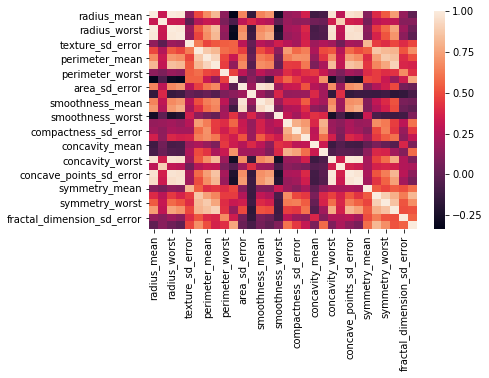

In [89]:
import seaborn as sns

CMat.style.background_gradient()
sns.heatmap(CMat)

Muticollinearity exists as many of the independent variables are highly correlated.
This means that we cannot simply select the features for particular models such as logistic regression even 
if on examination they appear to have predictive power.
Note this is not a concern if we use other models such as Decision Tree ( and other tree-based models) or even ANN.



### 1.	Identify 2-3 variables that are predictive of a malignant tumor.

### - Display the relationship visually and write 1-2 sentences explaining the relationship.


We will use the Point biserial correlation coefficient since our target variable is dichotomous (i.e binary)
and our independent feaures are continuous.

This will be calculated from scratch rathe than using the python libabry as the documentation suggests that the 
dicotomous variable must be X and in our case it is Y.


Formula for Point biserial correlation coefficient 

rbp = 

(N sum(XY)) - (sum(X)) * sum(Y)) / 
squareroot( (N* sum(sq(Y))) - sq(sum(Y)) )  * ( (N * sum(sq(X)) )  - sq(sum(X)) )

In [127]:

def CalcPointBS(X,Y):
    
    N = len(X) + len(Y)  

    return(( N* sum(X*Y)- (sum(X)*sum(Y)) ) /(( (N* sum(Y**2)) - (sum(Y)**2) ) * ( (N* sum(X**2)) - (sum(X)**2) ) )**0.5)


X = train["smoothness_mean"].values
Y = train["M"].values

rbp = CalcPointBS(X,Y)

print("Point Bi-serial correlation coefficient or smoothness_mean & M class : ",round(rbp,4))



Point Bi-serial correlation coefficient or smoothness_mean & M class :  0.6709


Let's calculate this statistic for all features and select 
the features that have the top 3 highest absolute values

In [250]:
xcolnames = train.drop(["ID","M"],axis=1).columns.values

ncols = len(xcolnames)

Y = train["M"].values
rbp = []
for i in xcolnames:
    X= train[i].values
    rbp.append(CalcPointBS(X,Y))

resPCC = pd.DataFrame([])


resPCC["features"]=xcolnames
resPCC["PCorCoeff"] =rbp

# features based on Point Bi-serial correaltion coefficcient stat.
f = resPCC.sort_values(by='PCorCoeff',ascending=False)

print(f)
print("Top 3 most predictive of a malignant tumor\n\n",f[0:3] )
    

                      features  PCorCoeff
7           perimeter_sd_error   0.819982
27      fractal_dimension_mean   0.804706
23        concave_points_worst   0.787609
6               perimeter_mean   0.766044
3                 texture_mean   0.753086
26              symmetry_worst   0.748917
22     concave_points_sd_error   0.712758
20             concavity_worst   0.703053
25           symmetry_sd_error   0.696437
5                texture_worst   0.684497
10               area_sd_error   0.678782
2                 radius_worst   0.672122
12             smoothness_mean   0.670904
0                  radius_mean   0.660666
13         smoothness_sd_error   0.638117
17           compactness_worst   0.589172
21         concave_points_mean   0.581347
1              radius_sd_error   0.566307
28  fractal_dimension_sd_error   0.564108
24               symmetry_mean   0.552936
29     fractal_dimension_worst   0.542746
4             texture_sd_error   0.528840
8              perimeter_worst   0

In [258]:
f[0:3]["features"].values[0]

'perimeter_sd_error'

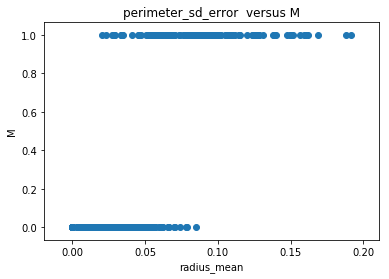

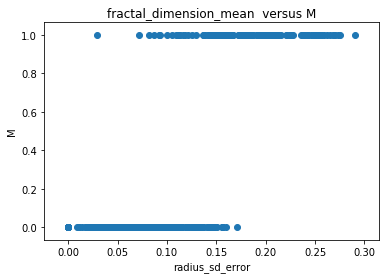

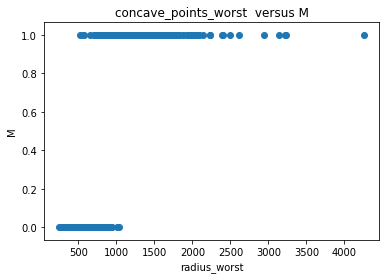

In [259]:
for i in range(3):
 x1 =train[f[0:3]["features"].values[i]]
 y1 = train["M"]
 plt.title(str(f[0:3]["features"].values[i]) +"  versus M")
 plt.xlabel(f["features"][i])
 plt.ylabel("M")
 plt.scatter(x=x1,y=y1)
 plt.show()

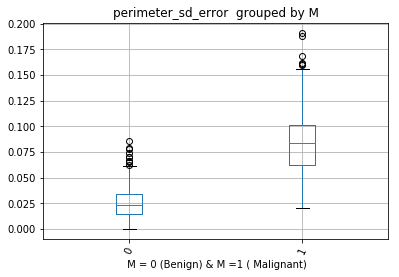

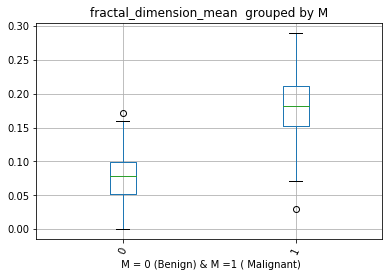

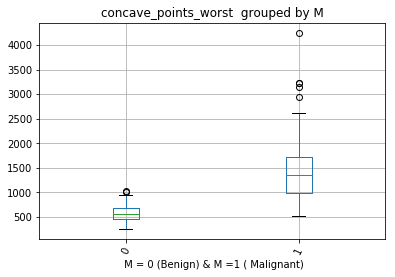

In [586]:
for i in range(3):
    train.boxplot(f[0:3]["features"].values[i],'M',rot=65)
    plt.title(str(f[0:3]["features"].values[i]) +"  grouped by M")
    plt.suptitle("")
    plt.xlabel(" M = 0 (Benign) & M =1 ( Malignant)")


##### Explanation of the relationship


From the box-plot above,we can see that all three predictors have higher mean and median values for the Malignant cells versus the Benign cells.
We also note that at some particular value for the respective feature, there is no overlap. For example, for concave_ponts_worst,
for values higher than 1100 (approx.) the cells are malignant (controlling for all other features).  


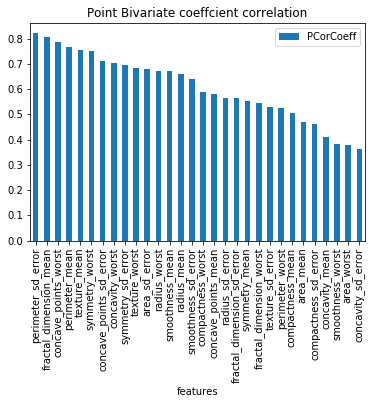

In [214]:
f.index = f["features"]
f.plot.bar()
plt.title("Point Biserial coeffcient correlation")
plt.show()

##### Explanation of the relationship (Cont'd)

The feature "perimeter_sd_error" has a strong linear relationship with the dependent variable M depicted by the
Point Biserial correlation coefficient of 0.819982

The feature "fractal_dimension_mean"  has a strong linear relationship with the dependent variable M depicted by the
Point Biserial correlation coefficient of  0.804706

The feature   "concave_points_worst"   has a strong linear relationship with the dependent variable M depicted by the
Point Biserial correlation coefficient of 0.787609

### Pre-processing step to balance classes for training dataset

In [294]:
from imblearn.over_sampling import SMOTE
xtrain = train.drop(["ID","M"],axis=1)
ytrain = train["M"]

# For consistency let's create the x & y for the test data
xtest = test.drop(["ID","M"],axis=1)
ytest = test["M"]

SM = SMOTE(random_state=2)
xtrainSMOTE,ytrainSMOTE=SM.fit_sample(xtrain,ytrain.ravel())



Note, balanced after SMOTE applied

### Before : class imbalance problem

Text(0,0.5,'Frequency')

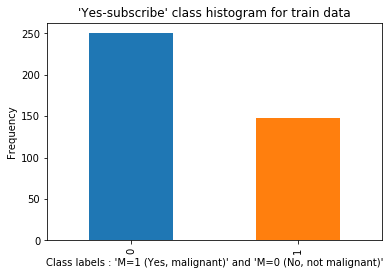

In [295]:
pd.value_counts(ytrain).plot.bar()
plt.title("'Yes-subscribe' class histogram for train data")
plt.xlabel("Class labels : 'M=1 (Yes, malignant)' and 'M=0 (No, not malignant)'")
plt.ylabel('Frequency')

### After : No class imbalance problem, classes now balanced

Text(0,0.5,'Frequency')

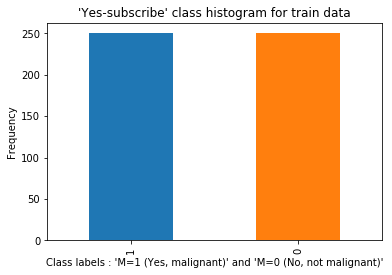

In [296]:
pd.value_counts(ytrainSMOTE).plot.bar()
plt.title("'Yes-subscribe' class histogram for train data")
plt.xlabel("Class labels : 'M=1 (Yes, malignant)' and 'M=0 (No, not malignant)'")
plt.ylabel('Frequency')

In [297]:

print("Instances in each classs, before SMOTE applied:")
print("For M=1, #instances:",sum(ytrain==1),"or ",round(sum(ytrain==1)*100/len(ytrain),2),"%")
print("For M=0, #instances:",sum(ytrain==0),"or ",round(sum(ytrain==0)*100/len(ytrain),2),"%")

print("\nAfter SMOTE: Balanced Classes")
print("For M=1, #instances:",sum(ytrainSMOTE==1),"or ",round(sum(ytrainSMOTE==1)*100/len(ytrainSMOTE),2),"%")
print("For M=0, #instances:",sum(ytrainSMOTE==0),"or ",round(sum(ytrainSMOTE==0)*100/len(ytrainSMOTE),2),"%")

Instances in each classs, before SMOTE applied:
For M=1, #instances: 148 or  37.19 %
For M=0, #instances: 250 or  62.81 %

After SMOTE: Balanced Classes
For M=1, #instances: 250 or  50.0 %
For M=0, #instances: 250 or  50.0 %


# Modeling

For our work now, we will use the following models :
    (i)   Decision Tree 
    (ii)  Random Forest 
    (iii) Gradient Boosted Tree 

### <font color = 'blue'>  Decision Tree

In [441]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

Dtree = tree.DecisionTreeClassifier()

In [442]:
nrows_train = len(xtrainSMOTE)
nrows_train

500

In [461]:
Dtree.params = {'max_depth' : [x for x in np.arange(3,8)],'min_samples_split' : [int(x) for x in nrows_train*np.arange(0.1,0.6,0.1)],'min_samples_leaf' : [int(x) for x in nrows_train*np.arange(0.1,0.8,0.1)]}
Dtree_CV = GridSearchCV(estimator=Dtree,param_grid=Dtree.params,cv=5,scoring='f1_micro')

In [462]:
%%time
ytrainSMOTE_arr = np.array(ytrainSMOTE)
Dtree_CV.fit(xtrainSMOTE,ytrainSMOTE_arr.ravel())



Wall time: 3.57 s


In [463]:
print(Dtree_CV.best_estimator_)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=200, min_samples_split=200,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [464]:
Dtree_CV.best_score_

0.896

##### Prediction on test dataset

In [465]:
from sklearn.metrics import f1_score
PredTresult = [x[1] for x in Dtree_CV.best_estimator_.predict_proba(xtest)]

PredTresult = np.where(np.array(PredTresult) > 0.5,1,0)
f1_Dtree = f1_score(ytest,PredTresult,average='micro')
print(f1_Dtree)

0.9005847953216374


## Confusion matrix


In [466]:
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report

In [467]:
confMat = cm(ytest,PredTresult,labels = [0,1])
tn, fp, fn, tp = confMat.ravel()
print("Confusion Matrix\n",confMat,"\n\n")

print("tn:",tn)
print("fp:",fp)
print("fn:",fn)
print("tp:",tp)


clReport = classification_report(ytest,PredTresult,labels = [0,1])
print(clReport)

Confusion Matrix
 [[102   5]
 [ 12  52]] 


tn: 102
fp: 5
fn: 12
tp: 52
             precision    recall  f1-score   support

          0       0.89      0.95      0.92       107
          1       0.91      0.81      0.86        64

avg / total       0.90      0.90      0.90       171



##### Feature importance

In [468]:
fImpValues = Dtree_CV.best_estimator_.feature_importances_


In [469]:
IndxNonzero = np.nonzero(fImpValues)

In [472]:
fImpValues

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

The following features had the three (3) highest scores based on their feature importance ranking
symmetry_worst with a feature importance score of 1.

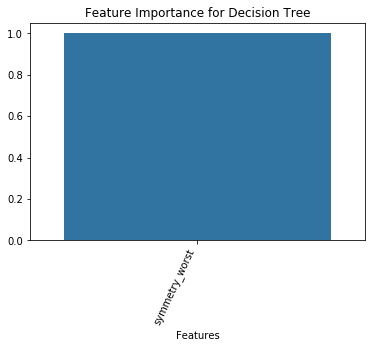

In [473]:
#import seaborn as sns
sns.barplot(x=train.columns.values[IndxNonzero], y=fImpValues[IndxNonzero] )
plt.xticks(rotation=65, horizontalalignment='right')
plt.title("Feature Importance for Decision Tree")
plt.xlabel("Features")
plt.show()

## <font color = blue > Random Forest 

In [474]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state=40)
RF.params = {'max_depth' : [x for x in np.arange(3,20)],'min_samples_split' : [int(x) for x in nrows_train*np.arange(0.1,0.9,0.1)],'min_samples_leaf' : [int(x) for x in nrows_train*np.arange(0.1,0.9,0.1)],'max_leaf_nodes' :[x for x in np.arange(5,20,1)]}

RF_CV = GridSearchCV(estimator=RF,param_grid=RF.params,scoring = 'f1_micro')

In [475]:
%%time
RF_CV.fit(xtrain,ytrain)

Wall time: 22min 38s


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=40, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'min_samples_split': [50, 100, 150, 200, 250, 300, 350, 400], 'min_samples_leaf': [50, 100, 150, 200, 250, 300, 350, 400], 'max_leaf_nodes': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_micro', verbose=0)

In [476]:
RF_CV.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=5,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=40, verbose=0, warm_start=False)

##### Feature importance

In [499]:
fImpValues = RF_CV.best_estimator_.feature_importances_

In [500]:
IndxNonzero = np.nonzero(fImpValues)

In [501]:
fImpValues

array([8.28809353e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.19586666e-05, 1.05336287e-02, 1.89335990e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.23375142e-05,
       2.83331196e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.04607692e-04, 0.00000000e+00, 0.00000000e+00,
       1.99322094e-01, 6.17160735e-03, 1.85122427e-01, 2.81702127e-01,
       5.38640750e-03, 0.00000000e+00, 0.00000000e+00, 1.08551664e-01,
       0.00000000e+00, 4.67372667e-03])

In [502]:
fImp_RF= pd.DataFrame({'Imp_Score': fImpValues,'features':xtrain.columns.values}).sort_values(by='Imp_Score',ascending=False)
fImp_RF

,Imp_Score,features
23,0.281702,concave_points_worst
20,0.199322,concavity_worst
7,0.189336,perimeter_sd_error
22,0.185122,concave_points_sd_error
27,0.108552,fractal_dimension_mean
6,0.010534,perimeter_mean
0,0.008288,radius_mean
21,0.006172,concave_points_mean
24,0.005386,symmetry_mean
29,0.004674,fractal_dimension_worst


The following features had the three (3) highest scores based on their feature importance ranking

(i)   concave_point_sd_error score of 0.28

(ii)  concavity_sd_error score of 0.199

(iii) perimeter_mean score of 0.189

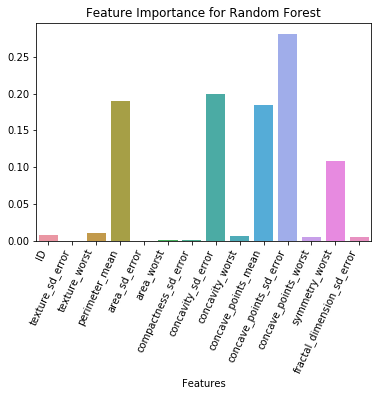

In [503]:
sns.barplot(x=train.columns.values[IndxNonzero],y=fImpValues[IndxNonzero])
plt.xticks(rotation=65, horizontalalignment='right')
plt.title("Feature Importance for Random Forest")
plt.xlabel("Features")
plt.show()

In [504]:
from sklearn.metrics import f1_score
PredTresult = [x[1] for x in RF_CV.best_estimator_.predict_proba(xtest)]

PredTresult = np.where(np.array(PredTresult) > 0.5,1,0)

f1_RF = f1_score(ytest,PredTresult,average='micro')
print(f1_RF)

0.935672514619883



# <font color = blue> Gradient Boosted Tree

In [505]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [506]:
GBC = GradientBoostingClassifier(random_state=4)

In [507]:
GBCparams = {'n_estimators' : [200],'max_depth' : [x for x in np.arange(3,6)],'min_samples_split' : [int(x) for x in nrows_train*np.arange(0.02,0.06,0.02)],'min_samples_leaf' : [int(x) for x in nrows_train*np.arange(0.02,0.06,0.02)]}

GBC_CV = GridSearchCV(estimator= GBC,param_grid= GBCparams,n_jobs=3)

In [508]:

%%time
GBC_CV.fit(xtrainSMOTE,ytrainSMOTE_arr.ravel())

Wall time: 9.63 s


GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=4, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'n_estimators': [200], 'max_depth': [3, 4, 5], 'min_samples_split': [10, 20], 'min_samples_leaf': [10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [509]:
GBC_CV.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=20, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=4, subsample=1.0, verbose=0,
              warm_start=False)

In [510]:
GBC_CV.best_score_

0.974

##### Feature importance

In [511]:
fImpValues = GBC_CV.best_estimator_.feature_importances_

In [512]:
IndxNonzero = np.nonzero(fImpValues)

In [513]:
IndxNonzero 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], dtype=int64),)

In [514]:
fImpValues

array([0.00565035, 0.0403516 , 0.01655478, 0.00940353, 0.01276672,
       0.02067748, 0.01770641, 0.08027292, 0.00962491, 0.00529412,
       0.00341625, 0.00930508, 0.01482917, 0.04514687, 0.01042898,
       0.02181888, 0.02096404, 0.01896472, 0.00656973, 0.00266901,
       0.01271043, 0.02386264, 0.06800578, 0.04864553, 0.04314172,
       0.00982956, 0.0363951 , 0.06658134, 0.01025504, 0.0031573 ])

In [515]:
fImp_GBT= pd.DataFrame({'Imp_Score': fImpValues,'features':xtrain.columns.values}).sort_values(by='Imp_Score',ascending=False)
fImp_GBT

,Imp_Score,features
7,0.080273,perimeter_sd_error
22,0.068006,concave_points_sd_error
27,0.066581,fractal_dimension_mean
23,0.048646,concave_points_worst
13,0.045147,smoothness_sd_error
24,0.043142,symmetry_mean
1,0.040352,radius_sd_error
26,0.036395,symmetry_worst
21,0.023863,concave_points_mean
15,0.021819,compactness_mean


### Most importance features for Gradient Boosted Tree:

Top 3 most important features (GBT):

The three (3) features listed below were all choosen based on their feature importance ranking.
These top 3 features had the 3 highest scores for this metric.

In [516]:
fImp_GBT.iloc[0:3,0:]

,Imp_Score,features
7,0.080273,perimeter_sd_error
22,0.068006,concave_points_sd_error
27,0.066581,fractal_dimension_mean


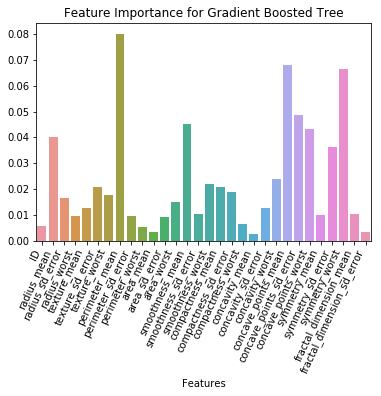

In [517]:
sns.barplot(x=train.columns.values[IndxNonzero],y=fImpValues[IndxNonzero])
plt.xticks(rotation=65, horizontalalignment='right')
plt.title("Feature Importance for Gradient Boosted Tree")
plt.xlabel("Features")
plt.show()

In [518]:
PredTresult = [x[1] for x in GBC_CV.best_estimator_.predict_proba(xtest)]

PredTresult = np.where(np.array(PredTresult) > 0.5,1,0)

f1_GBC = f1_score(ytest,PredTresult,average='micro')
print(f1_GBC)

0.9649122807017544


### Results across all three models on test set

In [519]:
dfplot = pd.DataFrame()

In [522]:
ModelNames = ["Decision Tree","Random Forest","Gradient Boosted Tree"]
dfplot['ModelNames']= ["Decision Tree","Random Forest","Gradient Boosted Tree"]
dfplot['F1-Score'] = [f1_Dtree,f1_RF,f1_GBC]
dfplot

,ModelNames,F1-Score
0,Decision Tree,0.900585
1,Random Forest,0.935673
2,Gradient Boosted Tree,0.964912


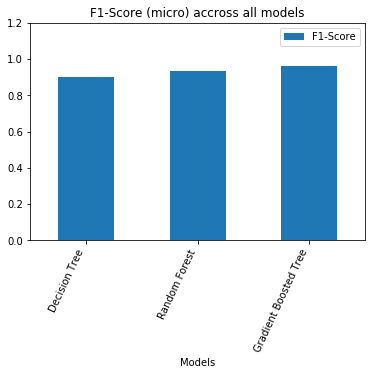

In [521]:
dfplot.plot(kind= 'bar', rot= 60)
# Set the labels for the x ticks

plt.xticks(np.arange(3), ModelNames,rotation=65, horizontalalignment='right')
plt.title("F1-Score (micro) accross all models")
plt.xlabel("Models")


plt.ylim(0,1.2)
plt.show()

# Comparison of Models (Adv. & Disadv.) &
# Control for Overfitting

Note, since we are using all tree-based models, there is no pre-processing required.

All tree-based models used have the following advantages :

    (i)   Robust to outliers
    (ii)  robust to missing data
    (iii) no feature scaling required
    (iv)  No prior assumptions about linearity
    (v)   Can give non-linear solution
    This saves a lot of time in the model building process when those pre-processng steps are eliminated.
    (vi) Inherent feature selection
    
    Decision Tree (Advantages):
    Decision Tree have all the advantages listed above of a Tree-based model with the additions below :
        (a) Highly interpretable since the "If-then-else" logic is intuitive and familiar to most persons. 
        (b) fast training time & computationally efficient (O(log2(N)) where N is # rows in dataset)
        (c) fast prediction time
    
    Decision Tree (Disadvantages)
        (a) High risk of over-fitting  
        (b) High  variance 
        (c) No globally optimal solution as the model makes locally optimal decisions
        
     
     Controlling for over fitting -Decision Tree
     (i) Prune Tree
         - This is when the tree is grown fully then shortened ("prune") by removing branches that do not significantly 
           decrease the accuracy (or other performance metric) when removed. In other words, does not contribute 
           significantly to the performance of the tree.
           
     (ii) Early stopping (effected as the max number of instances was set before a leaf can be created and the max tree depth 
          was also used as a threshold).
          
     (iii) K-Cross fold-validation used to help identify over-fitting but does not actually limit it.
          
          
          
     
     Random Forest (Advantages)
     All the advantages listed above of a Tree-based model with the additions below :
         (a) Less variance than a single tree. 
             - Bagging technique inherent in algorithm helps to limit over-fitting so the 
             reduction in variance outweights the increase in bias. Bagging is were bootstrap samples are used to build
             trees in parallel and the final prediction is an aggregation over all the trees (eg. mode in the case of 
             classification & average for regression). Note the randomness is also due to random sub-set selection of 
             columns and rows.
             
          (b) More accurate than single decision tree given the reduction in variance without a significant increase in 
              bias.
          
                
      
     Random Forest (Disadvantages)
          (a) Longer training  (as well as prediction time) than decision Tree and  Gradient Boosted Tree.
          (b) More complex model where the improved performance comes at the expense of interpretability.
              Since it is an ensemble model the steps in making a prediction are not clear in contrast to the Decision Tree. 
     
     
     Controlling for over fitting -Random Forest
           
     (i)  Similar to Decision Tree and GBT, early stopping was effected as the max number of instances was set before a leaf
          can be created and the max tree depth was also used as a threshold (shorter depth will usually lead to less over-
          fitting).
          
     (iii) For all model, K-fold Cross-validation used to help identify over-fitting but does not actually limit it. 
      
      
     Gradient Boosted Tree (Advantages):
      All the advantages listed above for a Tree-based model with the additions below :
         (a) More accurate Decision Tree and Random Forest Tree. The GBT's performance improvement however is achieved by 
             the models attempt to gradually improve the performance of the previous learner ( trying to correct the errors 
             of the previous learner).The learners are trained in sequence and not in parallel like that of the Random Forest 
             ensemble model and are dependent on each other versus Random Forest Learners which are independent.
             
         (b) More accurate than single decision tree.
         (c) Faster training time than Random Forest
         
      Gradient Boosted Tree (Disadvantages):
          (a) Longer training time than Decision Tree
          (a) Like the Random Forest, it is a more complex model versus the Decision Tree and the improved performance comes 
              at the expense of interpretability. Since it is an ensemble model the steps in making a prediction are not 
              clear in contrast to the Decision Tree.
              
       Control for Over-fitting
           (i)  Similar to Decision Tree and Random Forest,early stopping was effected as the max number of instances was set 
                before a leaf can be created and the max tree depth was also used as a threshold (shorter depth will usually 
                lead to less over-fitting).
          
           (ii) For all model, K-fold Cross-validation used to help identify over-fitting but does not actually limit it. 
        
      

# Explanation

Technical Audience:
    **Limitations of analysis :**
        (i)   All tree-basecd models, could have explored more diverse models. 
        
        (ii)  Kept highly multicollinear features, did not explore if performance
              would have improved had there been a reduction in multicollinearity.
            
        (iii) Limited range of tuning parameters used, performance may have been improved otherwise.  
    
    **Further steps that could be taken: **
        (i)   For all three models further tuning could have been done by expanding the range of tunning parameter values.
        (ii)  Explored using the logistic regression model and transformed features in oder to make the assumptions hold
              and applied regularization techniques there as well.
        
        (iii) Application of PCA which is an unsupervised technique to reduce dimensions and identify uncorrelated features
              this may have been useful particulaly in this case where there were so many highly correlated features. We 
              opted not to do this in this work because the new features are linear combinations of the original features 
              and are harder to explain. However if the performance outweighs this concern then this could be tried in the 
              future.
            
         (iv) We tried all tree-based models particularly because of the shorter pre-processing time versus other models. 
              However, we could have explored other models such as Artificial Neural Networks or Logistic Regrssion as 
              mentioned previously.
        
        


**Non-Technical Audience:**

     Summary of analysis
     
        **How it works?**
        
        Gradient Boosted Tree (GBT)
        The Gradient Boosted Tree uses several learners and essentialy tries to correct the mistakes of a previous learner.       
        
        **How it performs ?**
        The GBT achieved the highest score of all three models. This means it did the best job of correctly identifying 
        malignant tumors when it existed and having positive predictions be correct. The best model gives the best balance 
        of these metrics (i.e % of malignant tumors that were predicted correctly and % of malignant predictions that were 
        in fact corrrectly identified).
        
        It identified the perimeter_sd_error, concave_points_sd_error and the fractal_dimension_mean as the most important 
        features. That is, these features are the most useful in distinguishing a malignant tumor from a benign tumor. 
        
        

##### The End - Thank you - 